In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
#! Read the data
fp_lst = np.arange(5, 96, 5)
q_lst = np.arange(5, 96, 5)
# RN50
dfs_rn50 = []
for q in q_lst:
    dfs_rn50.append(pd.read_csv(f'./log/msp/RN50_{q}.csv'))
df_rn50 = pd.concat(dfs_rn50).reset_index(drop=True)
# ViT-B_16
dfs_vit16 = []
for q in q_lst:
    dfs_vit16.append(pd.read_csv(f'./log/msp/ViT-B_16_{q}.csv'))
df_vit16 = pd.concat(dfs_vit16).reset_index(drop=True)
# ViT-B_32
dfs_vit32 = []
for q in q_lst:
    dfs_vit32.append(pd.read_csv(f'./log/msp/ViT-B_32_{q}.csv'))
df_vit32 = pd.concat(dfs_vit32).reset_index(drop=True)
df_rn50.head()

,threshold,in_acc,iNaturalist,Textures,Places,SUN
0,0.080566,tensor(0.4481),0.2167,0.159574,0.1215,0.1284
1,0.115662,tensor(0.4481),0.4053,0.291135,0.2447,0.2594
2,0.147949,tensor(0.4481),0.5440,0.388830,0.3486,0.3712
3,0.182007,tensor(0.4481),0.6488,0.481206,0.4436,0.4739
4,0.215088,tensor(0.4481),0.7203,0.550177,0.5238,0.5537


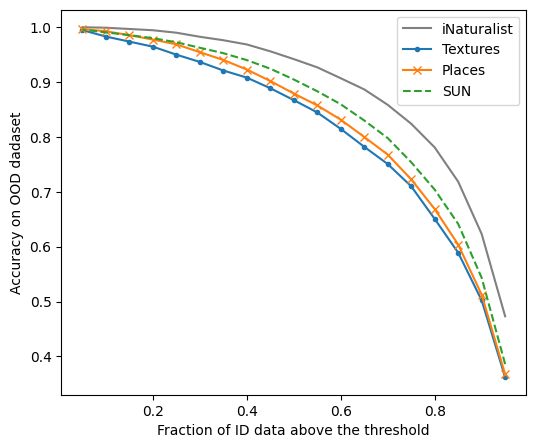

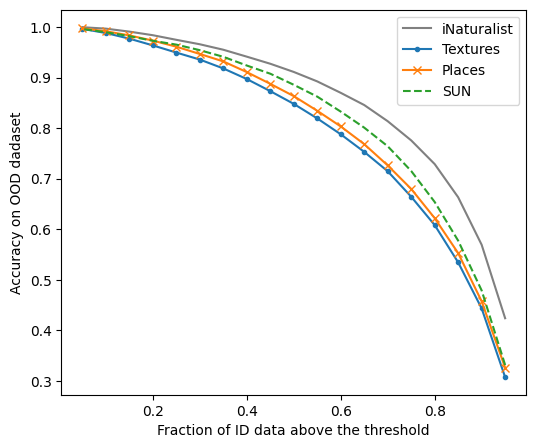

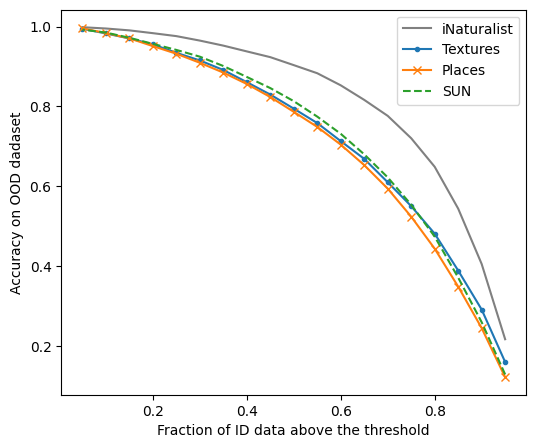

In [73]:
#! Plot: acc vs 100 - q_lst on vit16
def plot_acc_vs_fp(df):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    x = (100 - np.arange(5, 96, 5))/100
    ax.plot(x, df['iNaturalist'], label='iNaturalist', color='gray')
    ax.plot(x, df['Textures'], label='Textures', marker='.')
    ax.plot(x, df['Places'], label='Places', marker='x')
    ax.plot(x, df['SUN'], label='SUN', linestyle='--')
    ax.set_xlabel('Fraction of ID data above the threshold')
    ax.set_ylabel('Accuracy on OOD dadaset')
    ax.legend()
    return fig, ax
fig, ax = plot_acc_vs_fp(df_vit16)
fig.savefig('./fig/acc_vs_fp_vit16.pdf')
fig, ax = plot_acc_vs_fp(df_vit32)
fig.savefig('./fig/acc_vs_fp_vit32.pdf')
fig, ax = plot_acc_vs_fp(df_rn50)
fig.savefig('./fig/acc_vs_fp_rn50.pdf')

['tensor(0.4481)', 'tensor(0.5962)', 'tensor(0.6495)']


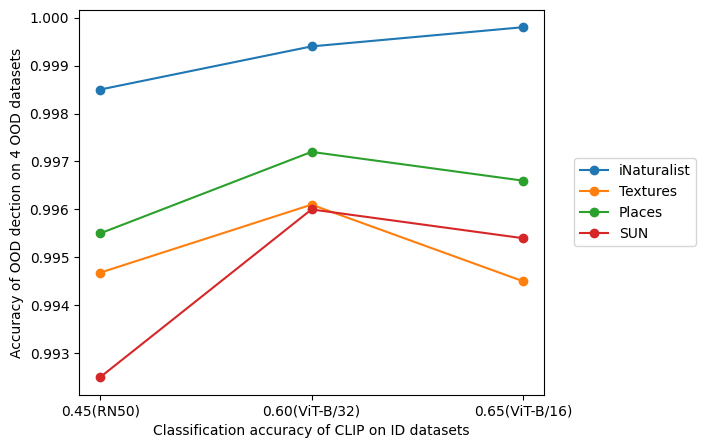

In [74]:
#! Plot: acc vs in_acc
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
x = [df_rn50['in_acc'][18], df_vit32['in_acc'][18], df_vit16['in_acc'][18]]
print(x)
y1 = [df_rn50['iNaturalist'][18], df_vit32['iNaturalist'][18], df_vit16['iNaturalist'][18]]
y2 = [df_rn50['Textures'][18], df_vit32['Textures'][18], df_vit16['Textures'][18]]
y3 = [df_rn50['Places'][18], df_vit32['Places'][18], df_vit16['Places'][18]]
y4 = [df_rn50['SUN'][18], df_vit32['SUN'][18], df_vit16['SUN'][18]]
# point + line
ax.plot(y1, label='iNaturalist', marker='o')
ax.plot(y2, label='Textures', marker='o')
ax.plot(y3, label='Places', marker='o')
ax.plot(y4, label='SUN', marker='o')
# set xticks as rn50, vit32, vit16
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0.45(RN50)', '0.60(ViT-B/32)', '0.65(ViT-B/16)'])
ax.set_xlabel('Classification accuracy of CLIP on ID datasets')
ax.set_ylabel('Accuracy of OOD dection on 4 OOD datasets')
# set legend to right middle
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.savefig('./fig/acc_vs_in_acc.pdf', bbox_inches='tight')